# New York City Airbnb Analysis


First, let's take a look at the data, and see how we might answer the three business questions according to 
the Airbnb dataset.

To get started, let's read in the necessary libraries we will need to wrangle our data: pandas and numpy. 
If we decided to build some basic plots, matplotlib might prove useful as well.

In [30]:
import pandas as pd
import numpy as np

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
%matplotlib inline

In [33]:
df= pd.read_csv('AB_NYC_2019.csv')

In [34]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

In [36]:
#lets look at how many missing values are in dataset
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [37]:
#Let's just start and iterate on our findings
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [38]:
#There are records with “price” = 0 which is unrealistic as this means no need to pay to stay. 
#So, these records should be removed.
df[df['price']==0]['neighbourhood_group'].count()

11

In [39]:
df.drop(df[df['price'] == 0].index, inplace = True) 

In [40]:
#In describe method maximum of 'minimum_nights'is 1250 which I believe is unrealistic (is this still an Airbnb or just another rental contract?).
df[df['minimum_nights'] > 365].count()

id                                14
name                              13
host_id                           14
host_name                         14
neighbourhood_group               14
neighbourhood                     14
latitude                          14
longitude                         14
room_type                         14
price                             14
minimum_nights                    14
number_of_reviews                 14
last_review                        6
reviews_per_month                  6
calculated_host_listings_count    14
availability_365                  14
dtype: int64

In [41]:
# I put a threshold as 365 days. Any records with “minimum_nights” larger than 365 will also be removed.
df.drop(df[df['minimum_nights'] > 365].index,inplace = True)

In [42]:
#Let's look at how many unique ids are
df['id'].nunique()

48870

In [43]:
#Let's look at how many hosts are
#unique hosts are below
df['host_id'].nunique()

37442

In [44]:
#Let's look at the hosts whome belongs to which neighbourhood
#many hosts have more than one houses or rooms in different areas 
df.groupby(['neighbourhood','host_id'])['host_id'].count().sort_values(ascending=False)

neighbourhood       host_id  
Financial District  219517861    218
Greenpoint          7503643       52
Financial District  12243051      51
Murray Hill         219517861     50
                    120762452     50
                                ... 
Midwood             26885466       1
                    27126954       1
                    27371081       1
                    28745989       1
Allerton            873273         1
Name: host_id, Length: 38298, dtype: int64

# Business Questions

## Question 1 What can we learn about different hosts and areas?

In [51]:
#Lets see how many hosts are from each neighbourhood group
df['neighbourhood_group'].value_counts()

Manhattan        21654
Brooklyn         20089
Queens            5664
Bronx             1090
Staten Island      373
Name: neighbourhood_group, dtype: int64

[]

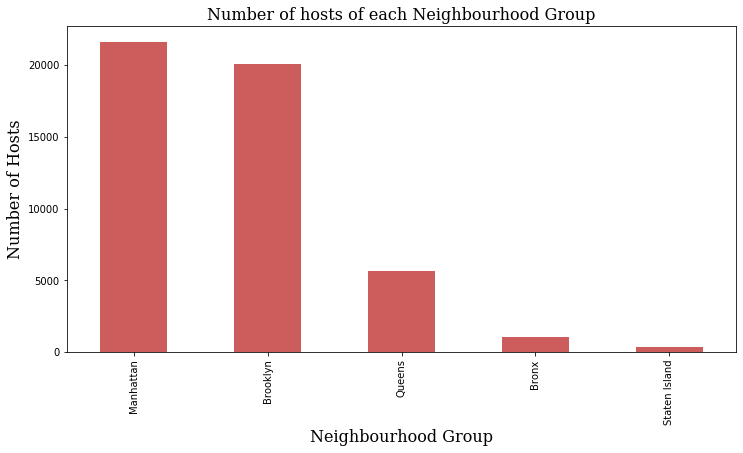

In [48]:
#here most of the hosts are from Manhattan and Broklyn
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }
plt.figure(figsize=(12,6))
df.groupby('neighbourhood_group')['id'].count().sort_values(ascending=False).plot(kind='bar',color='#CD5C5C')
plt.title("Number of hosts of each Neighbourhood Group",fontdict=font)
plt.xlabel("Neighbourhood Group",fontdict=font)
plt.ylabel("Number of Hosts",fontdict=font)
plt.plot()

In [52]:
#Segmentation of data for visualiztion of type of rooms¶¶
df_type_of_rooms=df['room_type'].value_counts()
df_type_of_rooms = pd.DataFrame({'Room Type': df_type_of_rooms.index,'Count': df_type_of_rooms.values})
df_type_of_rooms

,Room Type,Count
0,Entire home/apt,25398
1,Private room,22315
2,Shared room,1157


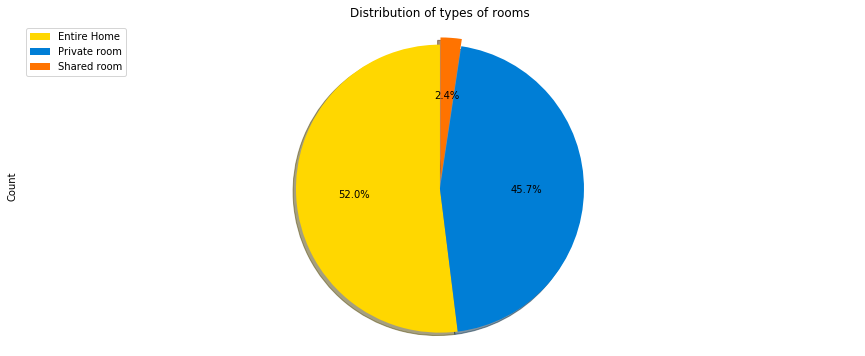

In [53]:
## Pie-Chart visualization of types of rooms
df_type_of_rooms['Count'].plot(kind='pie',
                               startangle=90,
                               shadow=True,
                               figsize=(15,6),
                               autopct="%1.1f%%",
                               labels=None,
                               explode=[0,0,0.05],
                               colors=['gold','#007ED6','#FF7300'])
plt.title('Distribution of types of rooms')
plt.axis('equal')
plt.legend(labels=['Entire Home','Private room','Shared room'],loc='upper left')

### Conclusion: Manhattan and Brooklyn have the highest number of different types of rooms available. So, most of the hosts are from Manhattan and Brooklyn.

## Question 2: How the location affects the prices of different types of rooms?

In [55]:
#lets see prices of different type of rooms may affect by each neighbourhood_group
df.groupby('neighbourhood_group')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group,,,,,,,,
Bronx,1090.0,87.577064,106.725371,10.0,45.0,65.0,99.0,2500.0
Brooklyn,20089.0,124.452238,186.922112,10.0,60.0,90.0,150.0,10000.0
Manhattan,21654.0,196.888011,291.421157,10.0,95.0,150.0,220.0,10000.0
Queens,5664.0,99.493997,167.125802,10.0,50.0,75.0,110.0,10000.0
Staten Island,373.0,114.812332,277.620403,13.0,50.0,75.0,110.0,5000.0


In [56]:
#Most Airbnb houses are in either Manhattan or Brooklyn. 
df_neighbourhood2=df.groupby(['neighbourhood_group','room_type'])['price'].mean().unstack(level=1)
df_neighbourhood2

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,127.506596,66.890937,59.800000
Brooklyn,178.356844,76.553547,50.773723
Manhattan,249.276359,116.776622,88.933194
Queens,147.031996,71.762456,69.020202
Staten Island,173.846591,62.292553,57.444444


Text(0, 0.5, 'Price')

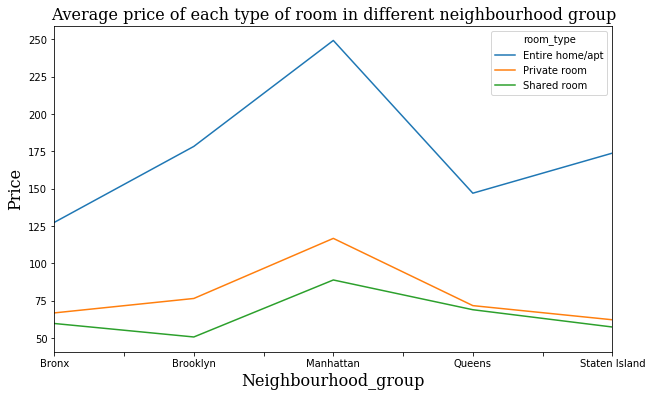

In [59]:
## Average price of each type of room in different neighbourhood group
df_neighbourhood2.plot(kind='line',figsize=(10,6))
plt.title("Average price of each type of room in different neighbourhood group",fontdict=font) 
plt.xlabel("Neighbourhood_group",fontdict=font)
plt.ylabel("Price",fontdict=font)

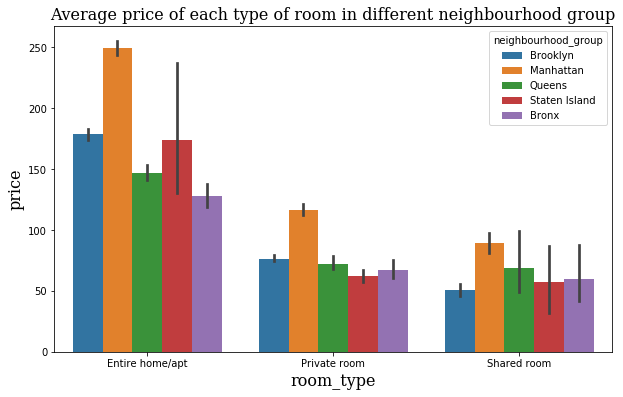

In [60]:
plt.figure(figsize=(10,6))
plt.title("Average price of each type of room in different neighbourhood group",fontdict=font) 
plt.xlabel('Room type',fontdict=font)
plt.ylabel('Price',fontdict=font)
sns.barplot(x='room_type',y='price',hue='neighbourhood_group',data=df,dodge=True,order=['Entire home/apt','Private room','Shared room']);

### Conclusion: Manhattan and Broklyn regions have the highest prices among the five regions.                          Here, the location and room_type feature is affected by price.


## Question 3: Which hosts are the busiest and why?

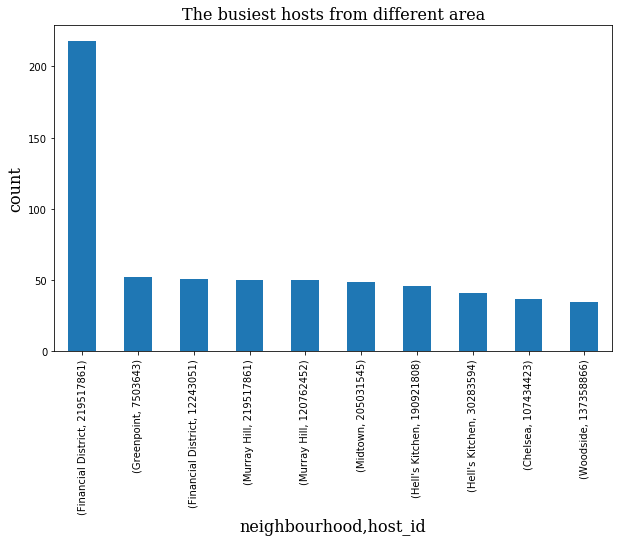

In [66]:
#Take a look of busiest hosts from different area(neighbourhood)
plt.figure(figsize=(10,6))
plt.title("The busiest hosts from different area",fontdict=font)
plt.xlabel("Neighbourhood",fontdict=font)
plt.ylabel("count",fontdict=font)
df.groupby(['neighbourhood','host_id'], sort=True)['host_id'].count().sort_values(ascending=False).head(10).plot(kind='bar')

In [64]:
#lets see the area of highest buiest hosts belongs to which neighbourhood group
df.groupby(['neighbourhood','neighbourhood_group'], sort=True)['host_id'].value_counts().sort_values(ascending=False).head(10)

neighbourhood       neighbourhood_group  host_id  
Financial District  Manhattan            219517861    218
Greenpoint          Brooklyn             7503643       52
Financial District  Manhattan            12243051      51
Murray Hill         Manhattan            219517861     50
                                         120762452     50
Midtown             Manhattan            205031545     49
Hell's Kitchen      Manhattan            190921808     46
                                         30283594      41
Chelsea             Manhattan            107434423     37
Woodside            Queens               137358866     35
Name: host_id, dtype: int64

### Conclusion: Here, the highest number of busiest hosts are from Financial District area compared to other area. Plus, most of the busiest hosts are from the Manhattan region.

In [67]:
#Take a look of neighbourhood group, and how these area plugin into maps
import folium
import folium.plugins as plugins
m = folium.Map(location=[40.7,-74], zoom_start=10)
df_loc= df[['latitude','longitude']].values
df_loc =df_loc.tolist()
hm = plugins.HeatMap(df_loc)
hm.add_to(m)
m

### The large red area is Manhattan and Brooklyn.